# EDA and Feature Engineering for Sales

In [7]:
#from source.dataspark_constants import ROW_DATA_PATH , PROCESSED_DATA_PATH
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
from sklearn.impute import SimpleImputer ,KNNImputer
import os

In [2]:
file_path = os.path.join('source', 'repository', 'row_data')
os.chdir(r'C:\DataSpark\source\repository\row_data')
df = pd.read_csv(r".\Sales.csv" ,  encoding='ISO-8859-1')
df

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code
0,366000,1,1/1/2016,NaN,265598,10,1304,1,CAD
1,366001,1,1/1/2016,1/13/2016,1269051,0,1048,2,USD
2,366001,2,1/1/2016,1/13/2016,1269051,0,2007,1,USD
3,366002,1,1/1/2016,1/12/2016,266019,0,1106,7,CAD
4,366002,2,1/1/2016,1/12/2016,266019,0,373,1,CAD
...,...,...,...,...,...,...,...,...,...
62879,2243030,1,2/20/2021,NaN,1216913,43,632,3,USD
62880,2243031,1,2/20/2021,2/24/2021,511229,0,98,4,EUR
62881,2243032,1,2/20/2021,2/23/2021,331277,0,1613,2,CAD
62882,2243032,2,2/20/2021,2/23/2021,331277,0,1717,2,CAD


##### Dimension of Data

In [4]:
df.shape

(62884, 9)

##### Checking Duplications and Missing Values

In [6]:
df.duplicated().sum()   # no duplications
df.isnull().sum()

Order Number         0
Line Item            0
Order Date           0
Delivery Date    49719
CustomerKey          0
StoreKey             0
ProductKey           0
Quantity             0
Currency Code        0
dtype: int64

##### Handling Missing delivery date (KNN imputer)

In [20]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%Y')
df['Delivery Date'] = pd.to_datetime(df['Delivery Date'], format='%m/%d/%Y')

# Calculate days since minimum order date
df['OrderDateDays'] = (df['Order Date'] - df['Order Date'].min()).dt.days

# Calculate days of the year for delivery dates (to use as numerical feature)
df['DeliveryDateDays'] = (df['Delivery Date'] - df['Order Date'].min()).dt.days

# KNN Imputation
imputer = KNNImputer(n_neighbors=3)
df[['OrderDateDays', 'DeliveryDateDays']] = imputer.fit_transform(df[['OrderDateDays', 'DeliveryDateDays']])

# Convert days back to dates
df['Delivery Date'] = pd.to_datetime(df['Order Date'].min()) + pd.to_timedelta(df['DeliveryDateDays'], unit='D')

# Drop intermediate columns
df.drop(columns=['OrderDateDays', 'DeliveryDateDays'], inplace=True)



In [21]:
df.isnull().sum()

Order Number     0
Line Item        0
Order Date       0
Delivery Date    0
CustomerKey      0
StoreKey         0
ProductKey       0
Quantity         0
Currency Code    0
dtype: int64

##### creating new Feature YEAR

In [25]:
df['Year'] = df['Delivery Date'].dt.year
df['Year']

0        2016
1        2016
2        2016
3        2016
4        2016
         ... 
62879    2021
62880    2021
62881    2021
62882    2021
62883    2021
Name: Year, Length: 62884, dtype: int32

In [26]:
df

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code,Year
0,366000,1,2016-01-01,2016-01-10,265598,10,1304,1,CAD,2016
1,366001,1,2016-01-01,2016-01-13,1269051,0,1048,2,USD,2016
2,366001,2,2016-01-01,2016-01-13,1269051,0,2007,1,USD,2016
3,366002,1,2016-01-01,2016-01-12,266019,0,1106,7,CAD,2016
4,366002,2,2016-01-01,2016-01-12,266019,0,373,1,CAD,2016
...,...,...,...,...,...,...,...,...,...,...
62879,2243030,1,2021-02-20,2021-02-24,1216913,43,632,3,USD,2021
62880,2243031,1,2021-02-20,2021-02-24,511229,0,98,4,EUR,2021
62881,2243032,1,2021-02-20,2021-02-23,331277,0,1613,2,CAD,2021
62882,2243032,2,2021-02-20,2021-02-23,331277,0,1717,2,CAD,2021


## EDA

##### Outlier detection

In [29]:
numerical_colomns =[item for item in df.columns if df[item].dtype != 'O']
numerical_colomns

['Order Number',
 'Line Item',
 'Order Date',
 'Delivery Date',
 'CustomerKey',
 'StoreKey',
 'ProductKey',
 'Quantity',
 'Year']

##### concatnating sales and products.

In [40]:
os.chdir(r'C:\DataSpark\source\repository\processed_data')
df.to_csv(r".\Sales.csv")
products=pd.read_csv(r".\Products.csv")
customers =pd.read_csv(r".\Customers.csv")
sales =df
products.drop(columns=['Unnamed: 0'],inplace=True)




In [43]:
products_sales = pd.merge(sales,products,on='ProductKey',how="left")
products_sales


,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code,Year,ProductName,Brand,Color,UnitCostUSD,UnitPriceUSD,SubcategoryKey,Subcategory,CategoryKey,Category,Transformed_Unit_Cost
0,366000,1,2016-01-01,2016-01-10,265598,10,1304,1,CAD,2016,Contoso Lens Adapter M450 White,Contoso,White,31.27,68.00,406,Cameras & Camcorders Accessories,4,Cameras and camcorders,3.474138
1,366001,1,2016-01-01,2016-01-13,1269051,0,1048,2,USD,2016,A. Datum SLR Camera X136 Silver,A. Datum,Silver,141.47,427.00,402,Digital SLR Cameras,4,Cameras and camcorders,4.959131
2,366001,2,2016-01-01,2016-01-13,1269051,0,2007,1,USD,2016,Fabrikam Microwave 1.5CuFt X1100 Black,Fabrikam,Black,220.64,665.94,803,Microwaves,8,Home Appliances,5.401054
3,366002,1,2016-01-01,2016-01-12,266019,0,1106,7,CAD,2016,Contoso SLR Camera M146 Orange,Contoso,Orange,148.08,322.00,402,Digital SLR Cameras,4,Cameras and camcorders,5.004483
4,366002,2,2016-01-01,2016-01-12,266019,0,373,1,CAD,2016,Adventure Works Laptop8.9 E0890 White,Adventure Works,White,166.20,326.00,301,Laptops,3,Computers,5.119191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62879,2243030,1,2021-02-20,2021-02-24,1216913,43,632,3,USD,2021,WWI Screen 85in E1010 White,Wide World Importers,White,70.87,139.00,305,Projectors & Screens,3,Computers,4.274859
62880,2243031,1,2021-02-20,2021-02-24,511229,0,98,4,EUR,2021,WWI Wireless Bluetooth Stereo Headphones M170 ...,Wide World Importers,Silver,55.18,120.00,106,Bluetooth Headphones,1,Audio,4.028561
62881,2243032,1,2021-02-20,2021-02-23,331277,0,1613,2,CAD,2021,SV DVD 7-Inch Player Portable E200 White,Southridge Video,White,56.08,109.99,602,Movie DVD,6,"Music, Movies and Audio Books",4.044454
62882,2243032,2,2021-02-20,2021-02-23,331277,0,1717,2,CAD,2021,MGS Flight Simulator X M250,Tailspin Toys,Pink,32.25,70.13,702,Download Games,7,Games and Toys,3.504055


##### Merging products , sales and Customers

In [45]:
df = pd.merge(products_sales,customers,on='CustomerKey',how='left')
df
df.columns

Index(['Order Number', 'Line Item', 'Order Date', 'Delivery Date',
       'CustomerKey', 'StoreKey', 'ProductKey', 'Quantity', 'Currency Code',
       'Year', 'ProductName', 'Brand', 'Color', 'UnitCostUSD', 'UnitPriceUSD',
       'SubcategoryKey', 'Subcategory', 'CategoryKey', 'Category',
       'Transformed_Unit_Cost', 'Unnamed: 0', 'Gender', 'Name', 'City',
       'State Code', 'State', 'Zip Code', 'Country', 'Continent', 'Birthday',
       'Age', 'Age Group'],
      dtype='object')

##### Age Group V/S Purchase 

<Axes: xlabel='Age Group', ylabel='Count'>

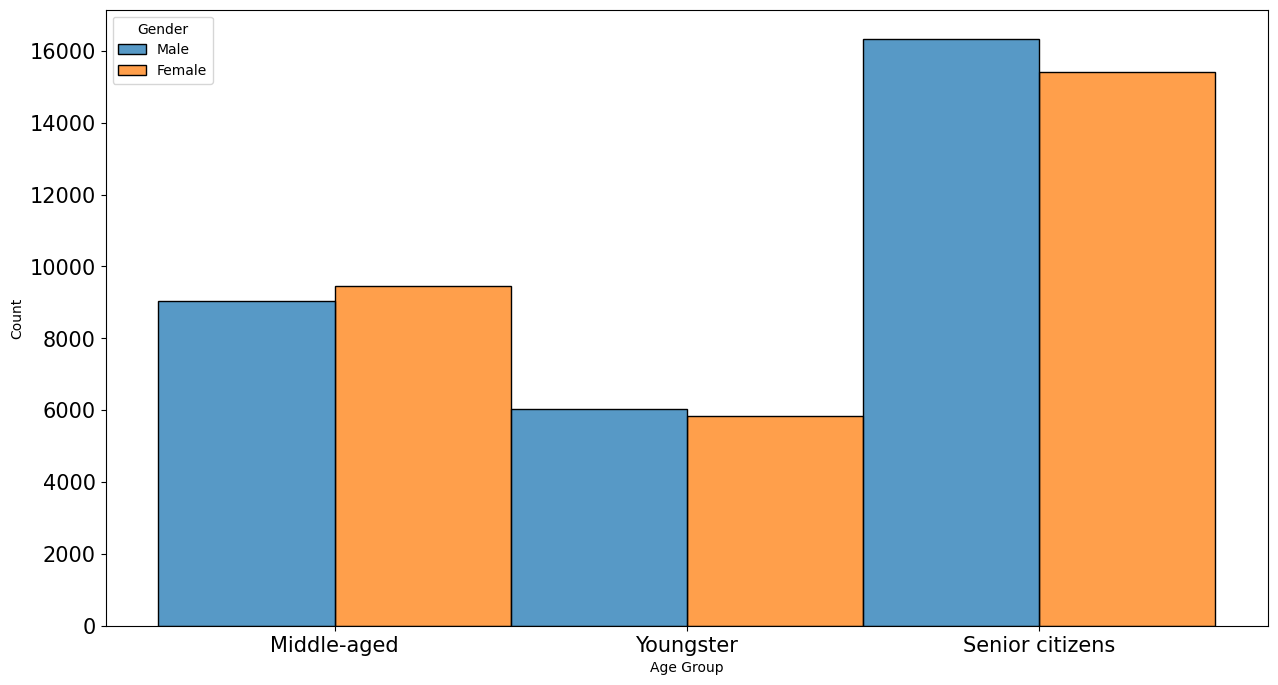

In [171]:
plt.figure(figsize=(15, 8)) 
plt.xlabel('Age Group',fontsize =10)
#plt.ylabel('Price(USD)',fontsize =50)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
sns.histplot(data =df,x='Age Group',hue = df['Gender'],multiple='dodge')

In [88]:
p=df.groupby(by=['Country'])['Order Number'].count().values
p




array([ 2932,  5366,  1705,  5891,  2663,  2213,  8013, 33317])

##### Sales of Each Brands in Countries

<Axes: xlabel='Brand', ylabel='Count'>

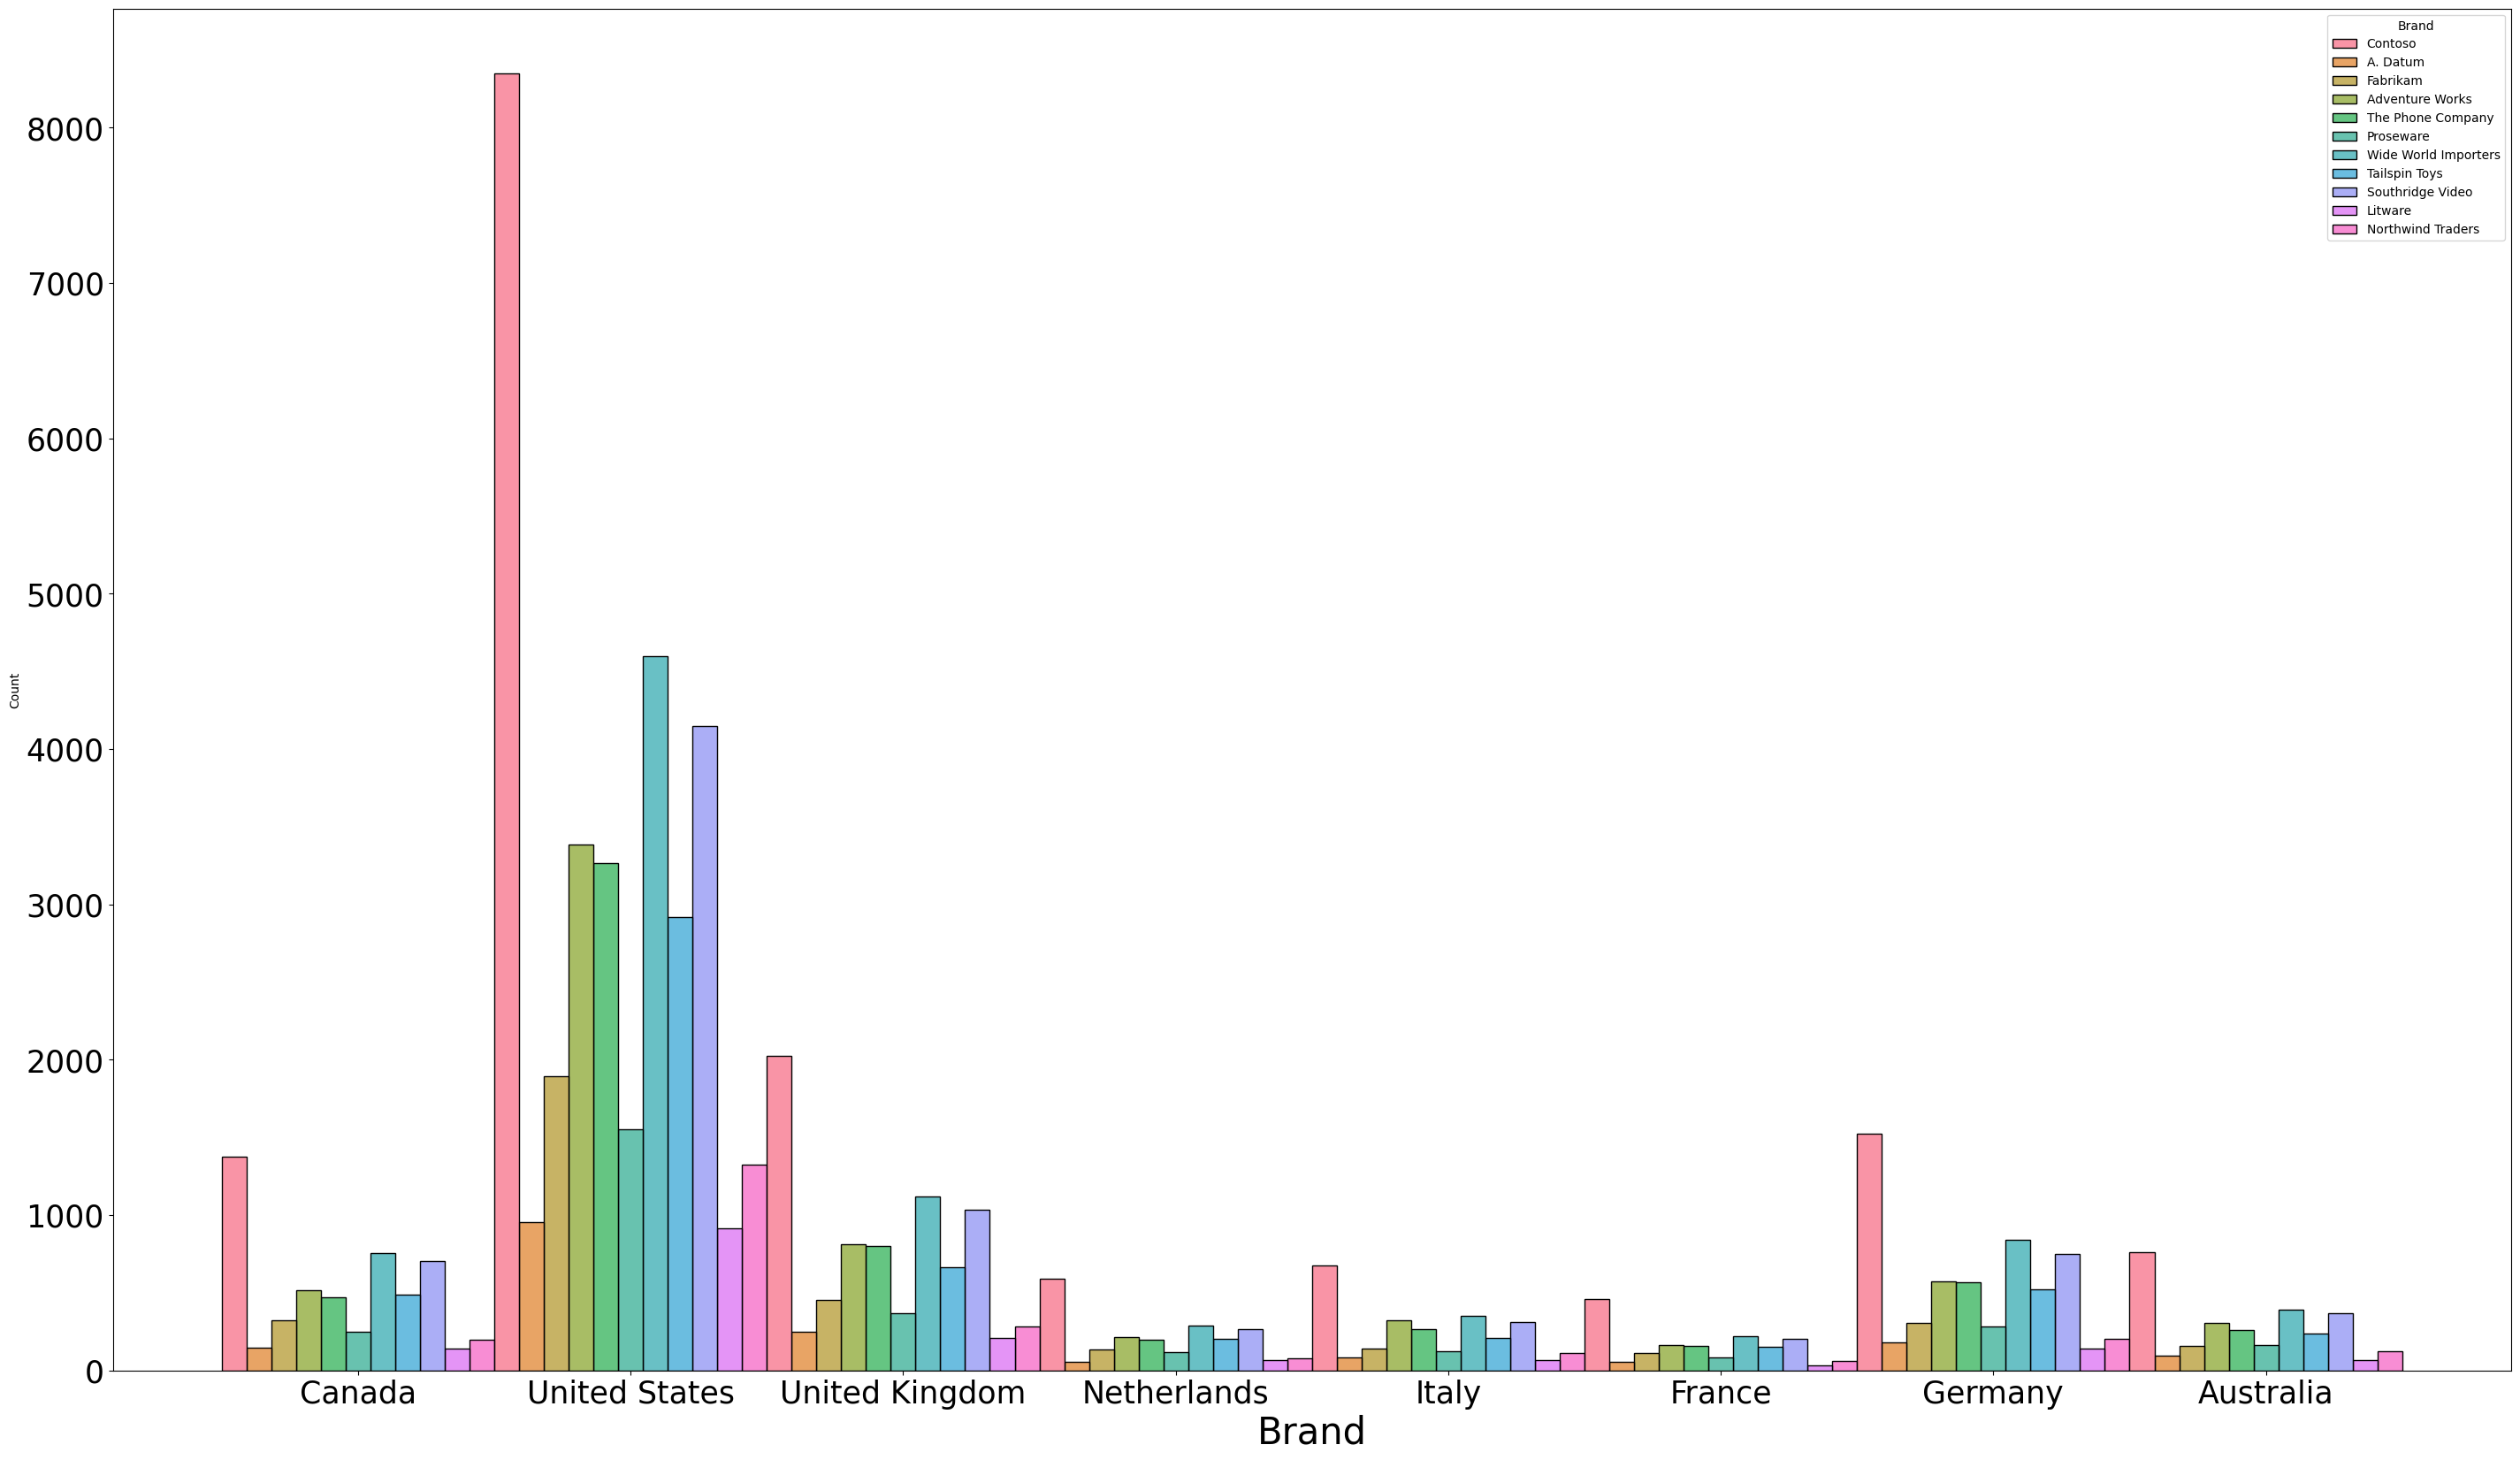

In [110]:
plt.figure(figsize=(35, 20)) 
plt.xlabel('Brand',fontsize =30)
#plt.ylabel('Price(USD)',fontsize =50)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
sns.histplot(data=df , x=df['Country'],hue=df['Brand'],multiple='dodge')


##### Year wise Sales for Each brand

In [161]:
d =pd.DataFrame( df.groupby(by=['Year','Brand'])['Order Number'].count())
d

Order Number
Year Brand                             
2016 A. Datum                       240
     Adventure Works                731
     Contoso                       1788
     Fabrikam                       505
     Litware                        307
...                                 ...
2021 Proseware                       60
     Southridge Video               185
     Tailspin Toys                  133
     The Phone Company              160
     Wide World Importers           153

[66 rows x 1 columns]

<Axes: xlabel='Year', ylabel='Count'>

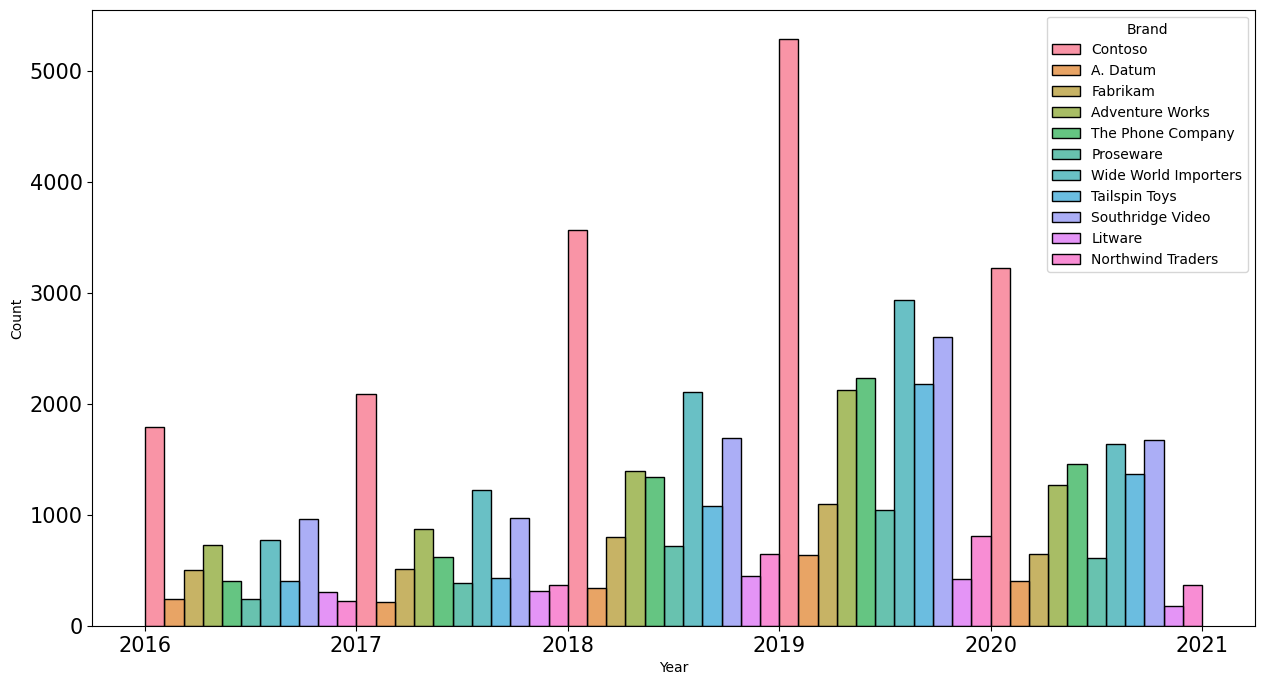

In [197]:
plt.figure(figsize=(15, 8)) 
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
sns.histplot(data =df ,bins=5 ,x='Year',hue=df['Brand'],multiple='dodge')




##### Yearwise Customer retention rate

<Axes: xlabel='Year', ylabel='Count'>

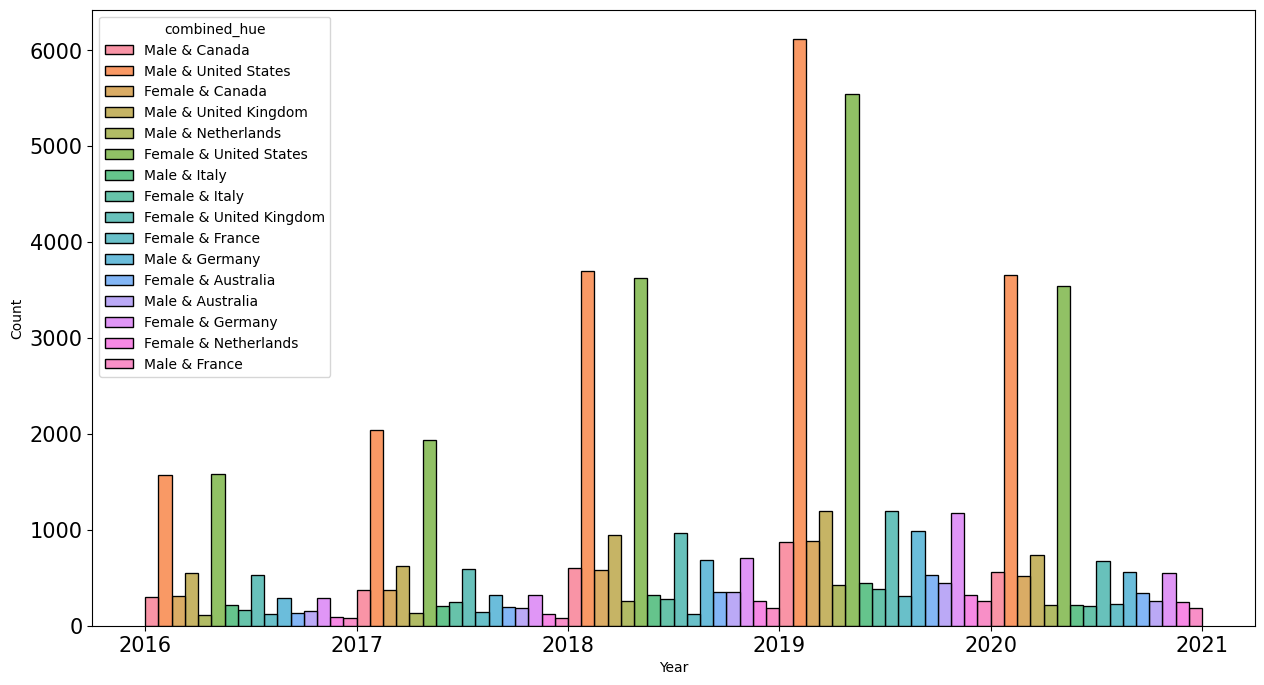

In [195]:
plt.figure(figsize=(15, 8)) 
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
df['combined_hue'] = df['Gender'] + ' & ' + df['Country']
sns.histplot(data =df ,bins=5 ,x='Year',hue='combined_hue',multiple='dodge')




##### Year wise sales Insights

Text(0.5, 1.0, 'Year V/s Continent')

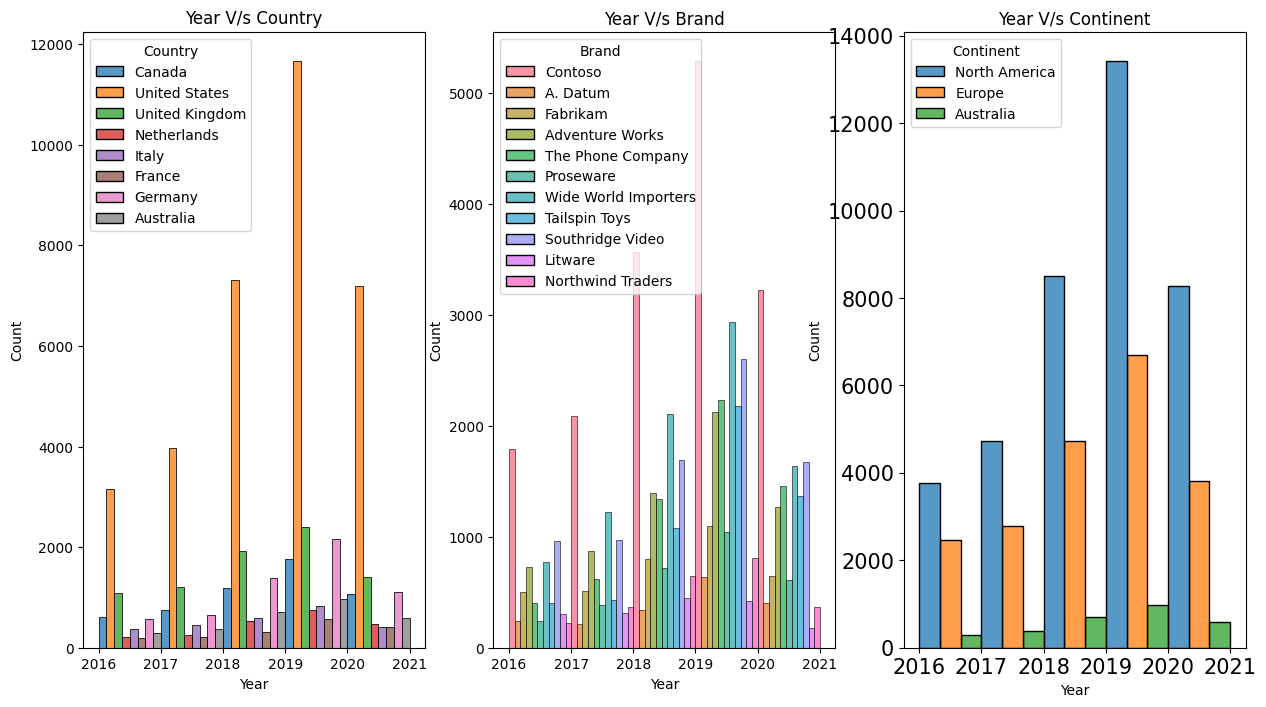

In [239]:
fig, axes = plt.subplots(1, 3, figsize=(15, 8))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
sns.histplot(data =df ,bins=5 ,x='Year',hue='Country',multiple='dodge' , ax=axes[0])
sns.histplot(data =df ,bins=5 ,x='Year',hue='Brand',multiple='dodge',ax=axes[1])
sns.histplot(data =df ,bins=5 ,x='Year',hue='Continent',multiple='dodge',ax=axes[2])
axes[0].set_title('Year V/s Country')
axes[1].set_title('Year V/s Brand')
axes[2].set_title('Year V/s Continent')

In [236]:
df['Year'].unique()

array([2016, 2017, 2018, 2019, 2020, 2021], dtype=int32)

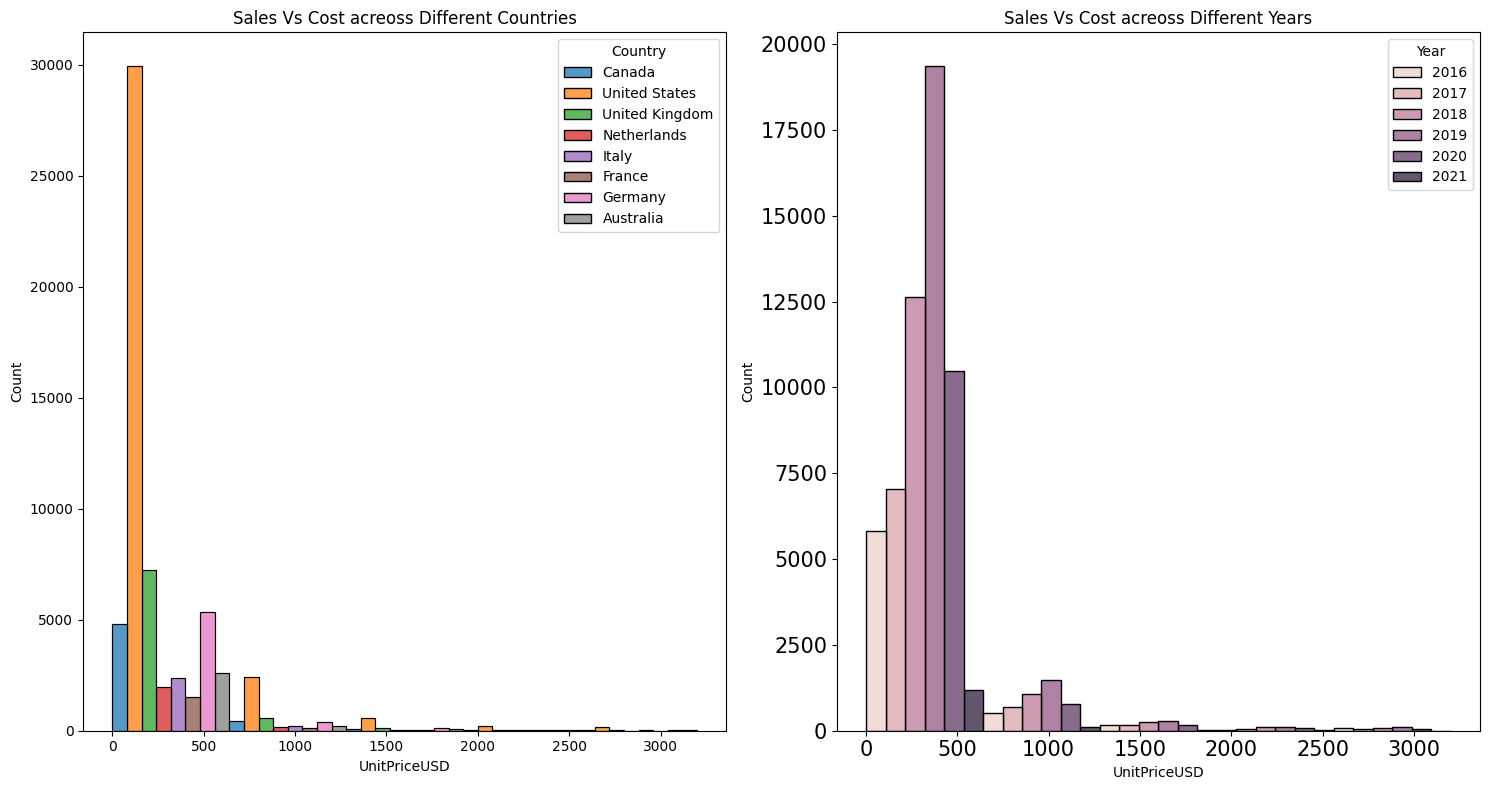

In [206]:
fig, axes = plt.subplots(1, 2, figsize=(15, 8))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
sns.histplot(data =df ,bins=5 ,x='UnitPriceUSD',hue='Country',multiple='dodge', ax=axes[0])
sns.histplot(data =df ,bins=5 ,x='UnitPriceUSD',hue='Year',multiple='dodge', ax=axes[1])
axes[0].set_title('Sales Vs Cost acreoss Different Countries')
axes[1].set_title('Sales Vs Cost acreoss Different Years')
plt.tight_layout()  # Adjust spacing between plots
plt.show()


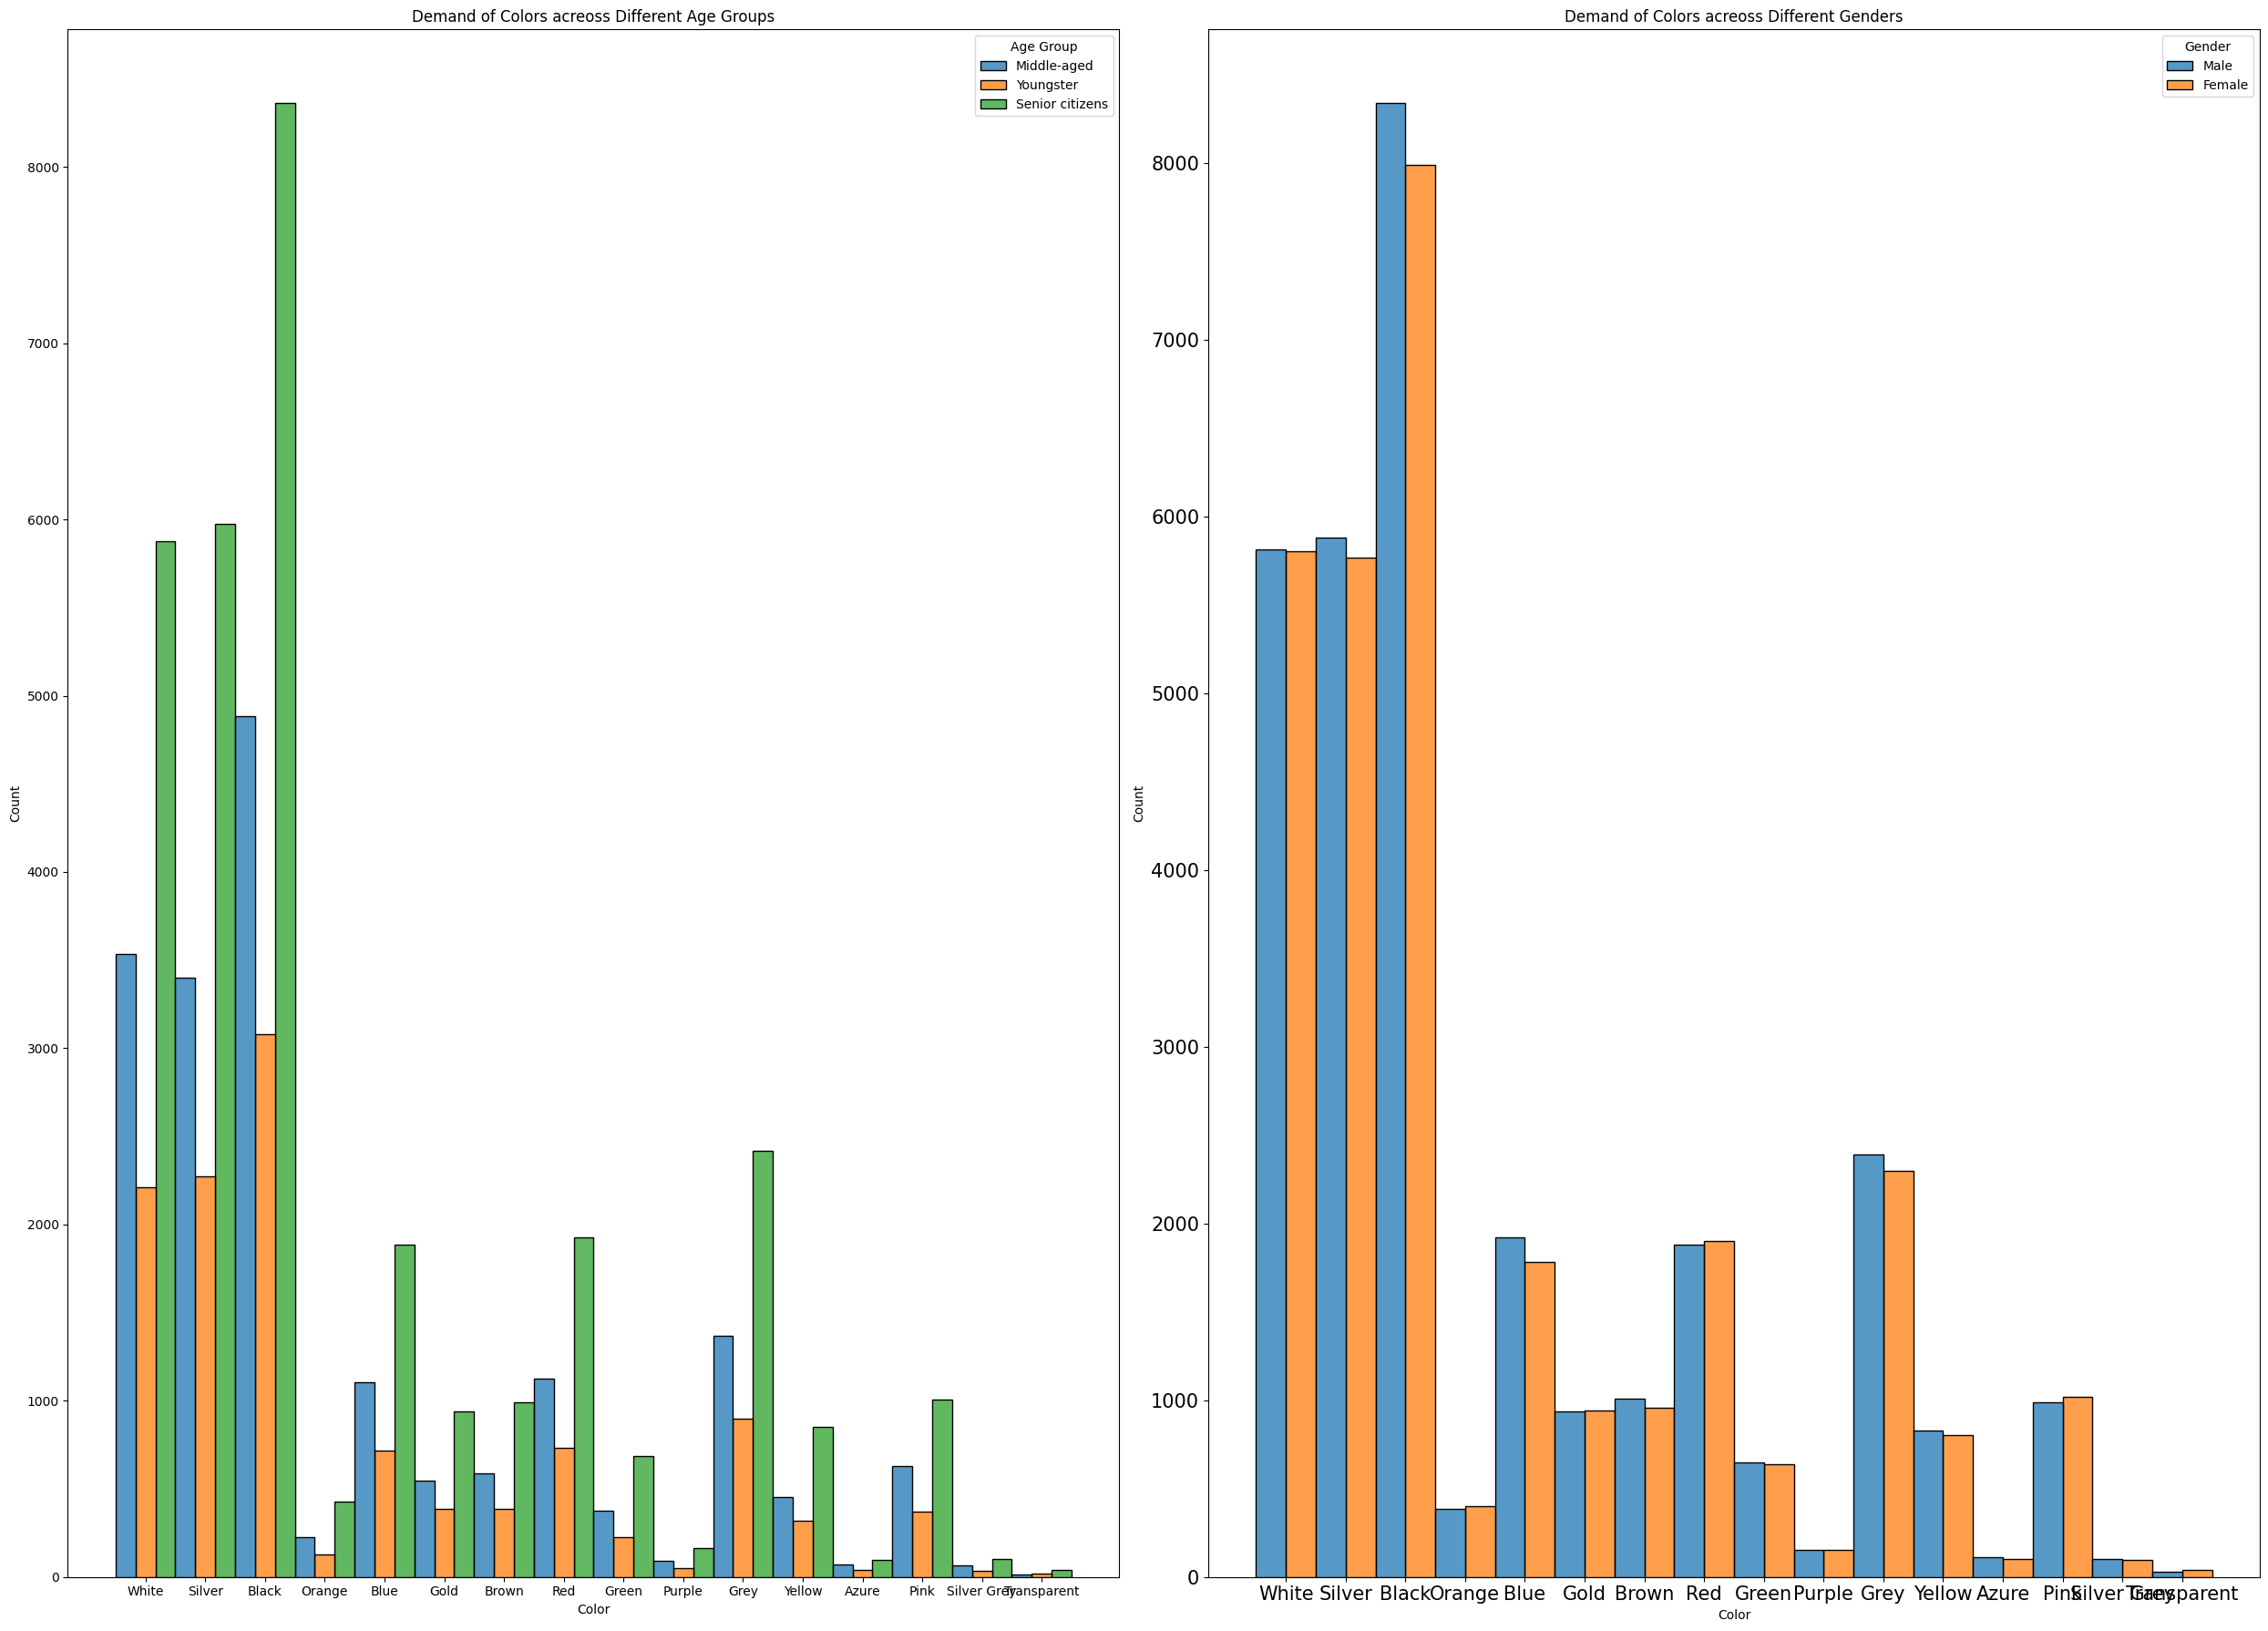

In [216]:

fig, axes = plt.subplots(1, 2, figsize=(25, 18))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
sns.histplot(data =df ,bins=5 ,x='Color',hue='Age Group',multiple='dodge', ax=axes[0])
sns.histplot(data =df ,bins=5 ,x='Color',hue='Gender',multiple='dodge', ax=axes[1])
axes[0].set_title('Demand of Colors acreoss Different Age Groups')
axes[1].set_title('Demand of Colors acreoss Different Genders')
plt.tight_layout()  # Adjust spacing between plots
plt.show()

In [242]:
os.chdir(r'C:\DataSpark\source\repository\processed_data')
df.to_csv(r".\Product_sales_customers.csv")
stores = pd.read_csv(r".\Stores.csv")
stores.drop(columns='Unnamed: 0')

,StoreKey,Country,State,Square Meters,Open Date,Category,Store Open Year
0,1,Australia,Australian Capital Territory,595.0,1/1/2008,Large,2008
1,2,Australia,Northern Territory,665.0,1/12/2008,Large,2008
2,3,Australia,South Australia,2000.0,1/7/2012,Extra-large,2012
3,4,Australia,Tasmania,2000.0,1/1/2010,Extra-large,2010
4,5,Australia,Victoria,2000.0,12/9/2015,Extra-large,2015
...,...,...,...,...,...,...,...
62,63,United States,Utah,2000.0,3/6/2008,Extra-large,2008
63,64,United States,Washington DC,1330.0,1/1/2010,Large,2010
64,65,United States,West Virginia,1785.0,1/1/2012,Large,2012
65,66,United States,Wyoming,840.0,1/1/2014,Large,2014


In [245]:
df.columns
df = pd.merge(df,stores , on='StoreKey',how='left')
df

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code,Year,...,Age,Age Group,combined_hue,Unnamed: 0_y,Country_y,State_y,Square Meters,Open Date,Category_y,Store Open Year
0,366000,1,2016-01-01,2016-01-10,265598,10,1304,1,CAD,2016,...,53.0,Middle-aged,Contoso & Cameras and camcorders,9,Canada,Nunavut,1210.0,4/4/2015,Large,2015
1,366001,1,2016-01-01,2016-01-13,1269051,0,1048,2,USD,2016,...,29.0,Youngster,A. Datum & Cameras and camcorders,66,Online,Online,NaN,1/1/2010,NaN,2010
2,366001,2,2016-01-01,2016-01-13,1269051,0,2007,1,USD,2016,...,29.0,Youngster,Fabrikam & Home Appliances,66,Online,Online,NaN,1/1/2010,NaN,2010
3,366002,1,2016-01-01,2016-01-12,266019,0,1106,7,CAD,2016,...,62.0,Senior citizens,Contoso & Cameras and camcorders,66,Online,Online,NaN,1/1/2010,NaN,2010
4,366002,2,2016-01-01,2016-01-12,266019,0,373,1,CAD,2016,...,62.0,Senior citizens,Adventure Works & Computers,66,Online,Online,NaN,1/1/2010,NaN,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62879,2243030,1,2021-02-20,2021-02-24,1216913,43,632,3,USD,2021,...,85.0,Senior citizens,Wide World Importers & Computers,42,United States,Alaska,1190.0,1/1/2015,Large,2015
62880,2243031,1,2021-02-20,2021-02-24,511229,0,98,4,EUR,2021,...,84.0,Senior citizens,Wide World Importers & Audio,66,Online,Online,NaN,1/1/2010,NaN,2010
62881,2243032,1,2021-02-20,2021-02-23,331277,0,1613,2,CAD,2021,...,31.0,Youngster,"Southridge Video & Music, Movies and Audio Books",66,Online,Online,NaN,1/1/2010,NaN,2010
62882,2243032,2,2021-02-20,2021-02-23,331277,0,1717,2,CAD,2021,...,31.0,Youngster,Tailspin Toys & Games and Toys,66,Online,Online,NaN,1/1/2010,NaN,2010


##### Sales from Different stores by Different Age groups

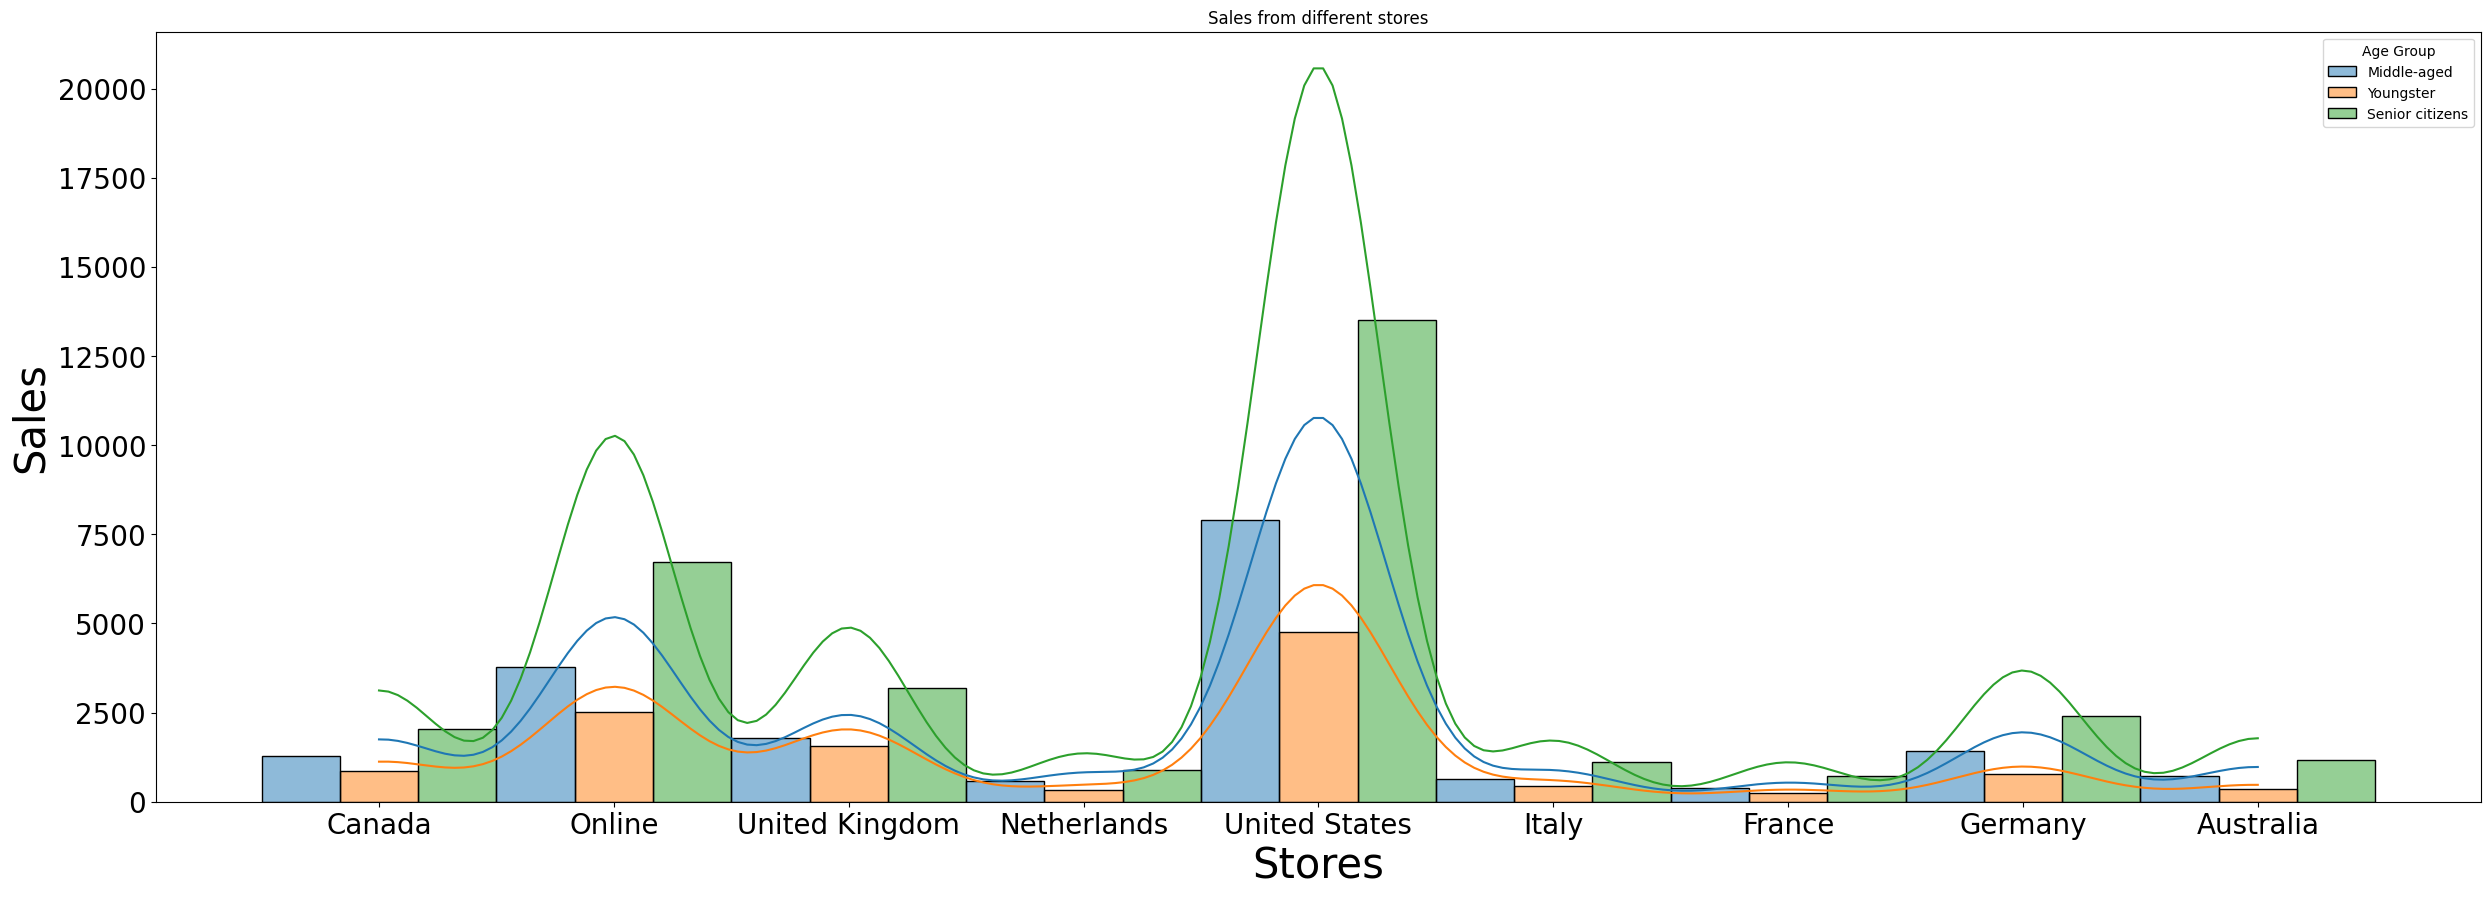

In [258]:

plt.figure(figsize=(30,10))
plt.title("Sales from different stores")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Stores',fontsize=30)
plt.ylabel('Sales',fontsize=30)
sns.histplot(data =df ,bins=5 ,x='Country_y',hue='Age Group',multiple='dodge',kde=True)
#sns.histplot(data =df ,bins=5 ,x='Country_y',hue='Brand',multiple='dodge', ax=axes[1])

plt.show()

##### Sales from Different Stores by Store Size

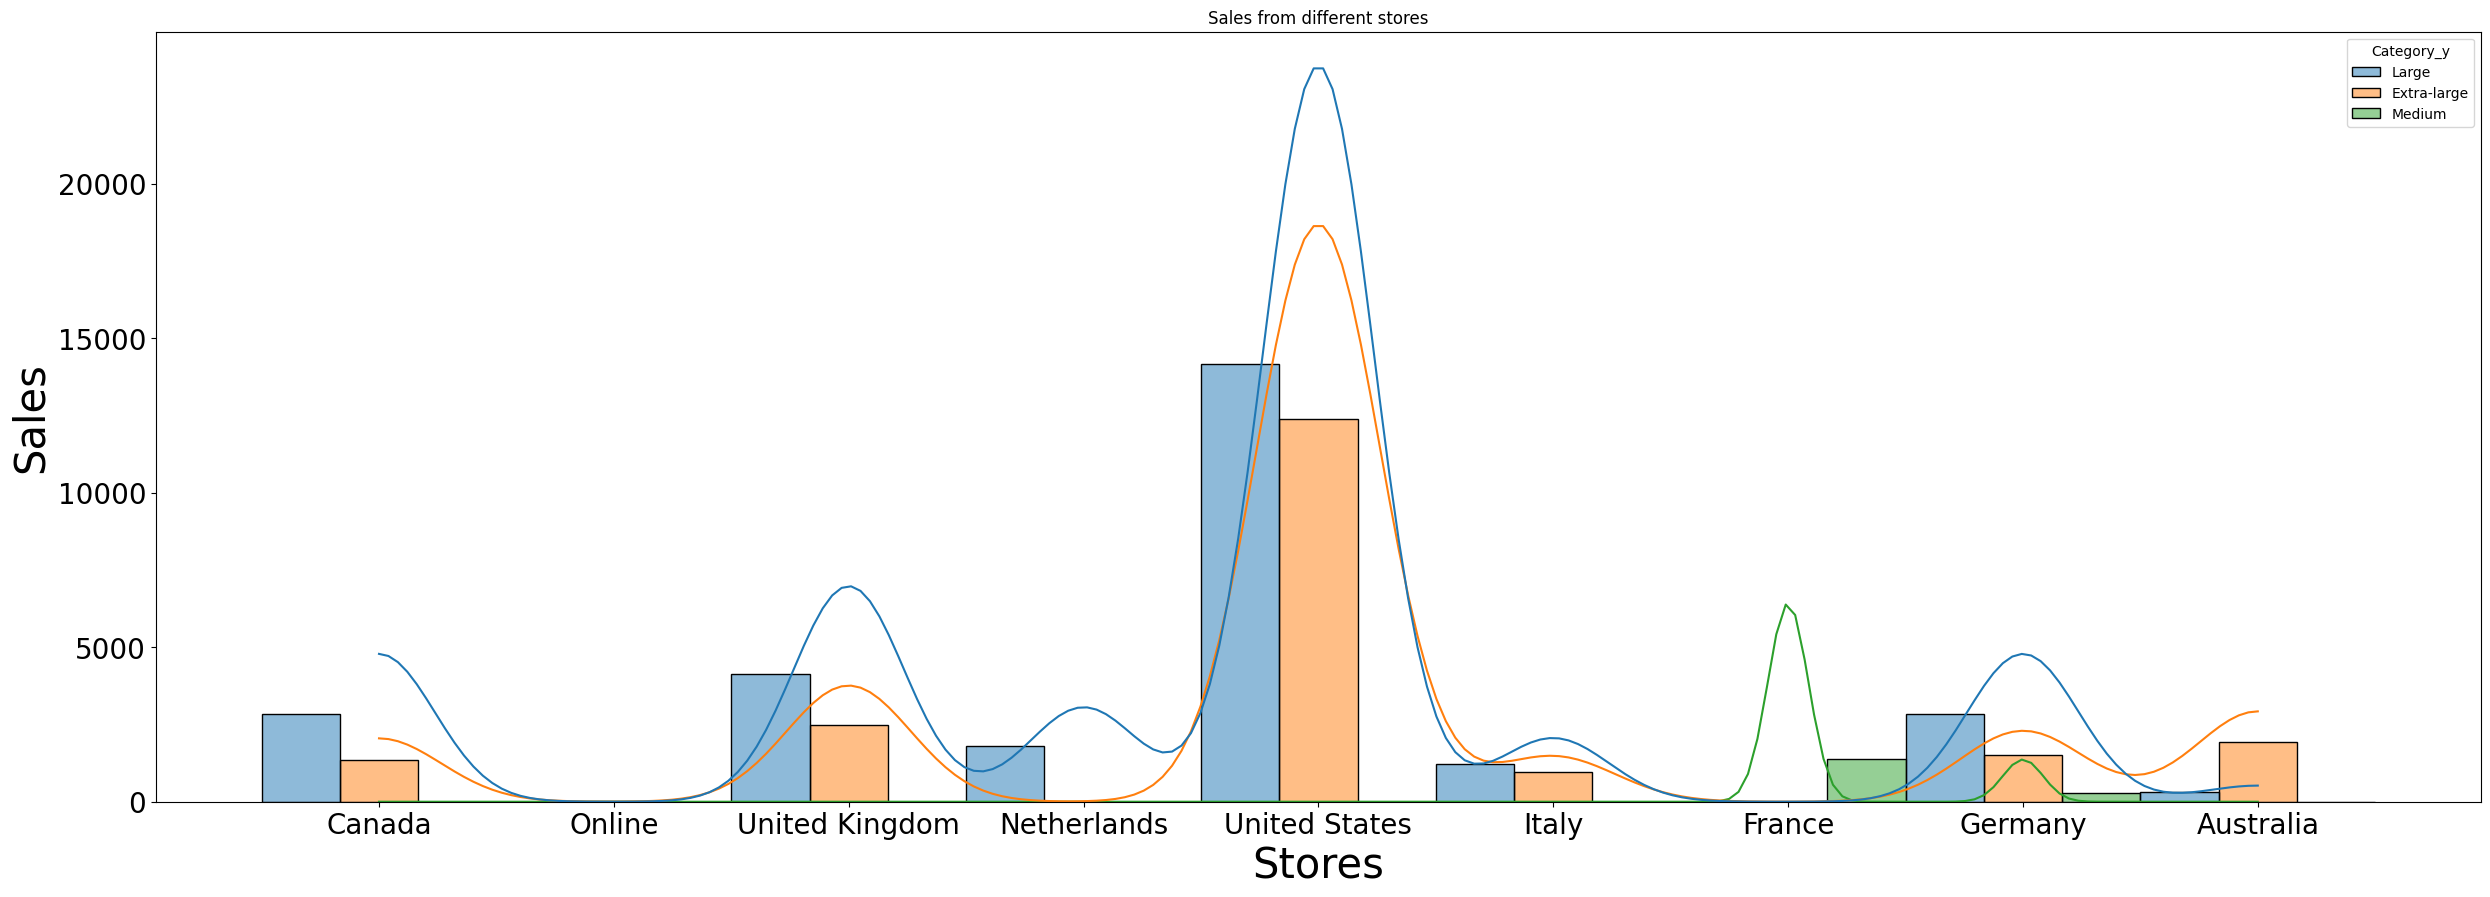

In [259]:

plt.figure(figsize=(30,10))
plt.title("Sales from different stores")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Stores',fontsize=30)
plt.ylabel('Sales',fontsize=30)
sns.histplot(data =df ,bins=5 ,x='Country_y',hue='Category_y',multiple='dodge',kde=True)
#sns.histplot(data =df ,bins=5 ,x='Country_y',hue='Brand',multiple='dodge', ax=axes[1])

plt.show()

##### Stores And Brands

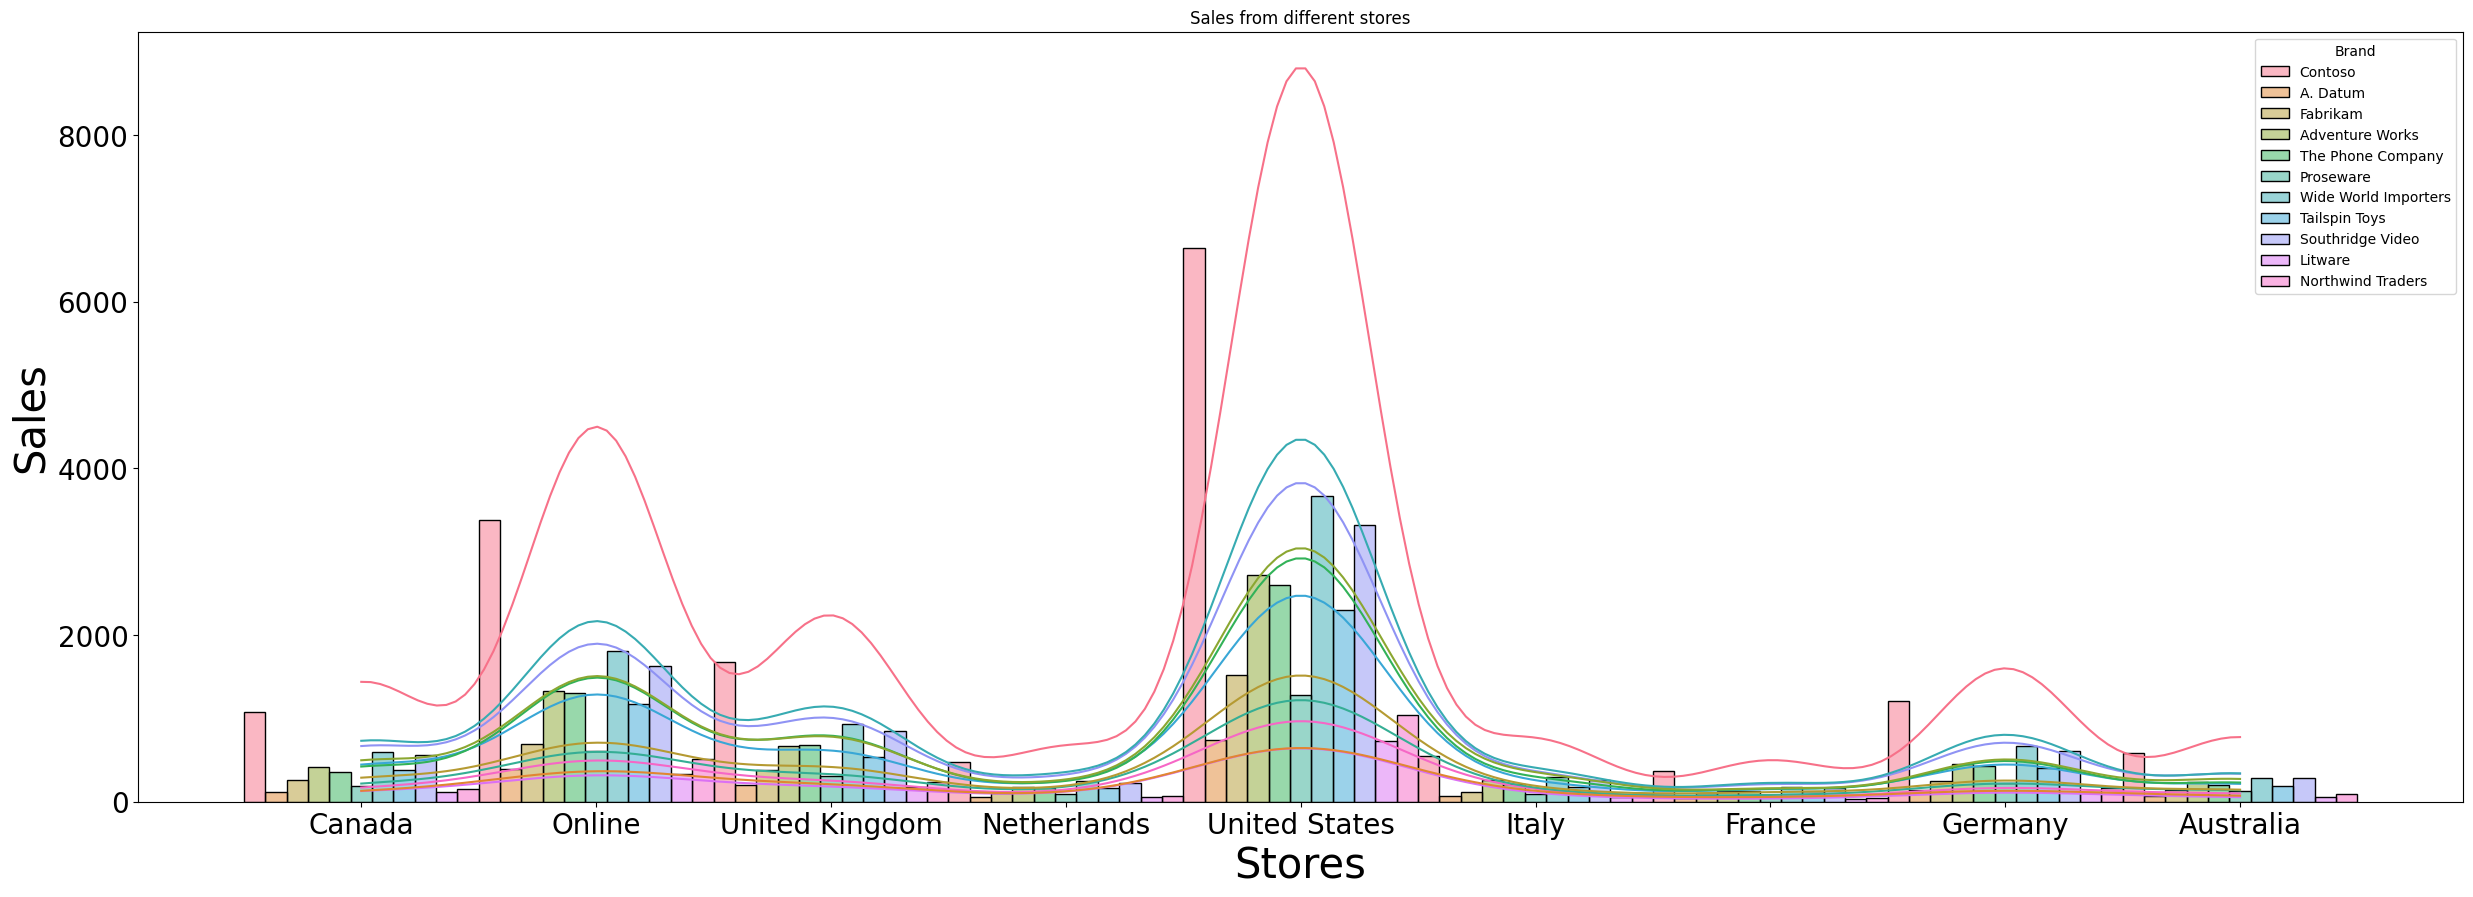

In [260]:

plt.figure(figsize=(30,10))
plt.title("Sales from different stores")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Stores',fontsize=30)
plt.ylabel('Sales',fontsize=30)
sns.histplot(data =df ,bins=5 ,x='Country_y',hue='Brand',multiple='dodge',kde=True)
#sns.histplot(data =df ,bins=5 ,x='Country_y',hue='Brand',multiple='dodge', ax=axes[1])

plt.show()

##### Insights

######  1. Male Senior Citizens are Puchasing More Products 
######  2. Black is the Most demanded Color 
######  3. 'North Wind Traders' is the most demmanded item
######  4. Most of the sale is concentrated on US becouse , Majority of the Large and Extra-Larged size stores are concentrated on the U S .
######  5. Huge amouts of items are sold in 2019 compared to othor years
######  6. Most selling item is of Cost $500

##### Suggestions
###### 1. Most of the business are happening in physical stores , increase online promotoons
###### 2. Build more stores on different Countries